Learn to predict the number of real solutions of the tritangent circles to three conics.

In [59]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np

In [60]:
# Import Data
path = '/Users/las/Documents/GitHub/REU/hill_climb_w_solution_counts.xlsx'
df = pd.read_excel(path)
data = df[[col for col in df.columns if col[0].isupper()]].rename(str.lower, axis='columns')
df.head()

,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,...,B4,B5,B6,C1,C2,C3,C4,C5,C6,Counts
0,0.080945,0.360232,0.057056,0.749259,0.955720,0.807542,0.632065,0.987198,0.858777,0.747515,...,1.009519,0.753096,0.486770,-0.004601,0.190029,0.265888,0.167961,0.726625,0.297465,26
1,0.020657,0.528250,0.785039,0.140394,0.629471,0.232232,0.442754,0.177439,0.541098,0.378114,...,0.461198,0.016416,0.170428,0.486811,0.728032,0.885663,0.050032,0.648216,0.157806,0
2,0.524718,0.271188,0.617312,0.352435,0.446476,0.870586,0.790443,0.930621,0.314740,0.650593,...,0.638183,0.010259,-0.030974,0.778479,1.059313,0.434567,0.503703,0.603667,0.192912,10
3,0.391623,0.766953,0.151090,0.986174,0.769373,0.199420,0.685867,0.058377,0.051811,0.073706,...,0.064034,0.401679,0.929817,0.090694,0.480075,0.301884,0.614086,0.812183,0.725908,20
4,0.914580,0.289532,0.338711,0.269049,0.688129,0.896449,0.850288,0.451521,0.327267,0.763946,...,0.408069,0.124350,-0.231770,0.388754,0.696648,0.785599,0.885972,0.387142,0.583846,8


In [61]:
# Create Training and Validation Data
count = np.array(data['counts'].values.tolist(), dtype=np.int)/2
param = np.array(data.drop('counts', axis=1).values.tolist(), dtype=np.float64)
n = int(0.8*len(count))

count_train, count_val = count[:n], count[n:]
param_train, param_val = param[:n], param[n:]

/Users/las/opt/anaconda3/envs/REU/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [62]:
# Set Up Network Architecture
model = keras.Sequential([
    keras.layers.Dense(units=300, activation='sigmoid', input_shape=(18,)),
    keras.layers.Dense(units=300, activation='sigmoid'),
    keras.layers.Dense(units=300, activation='sigmoid'),
    keras.layers.Dense(units=69, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 300)               5700      
_________________________________________________________________
dense_32 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_33 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_34 (Dense)             (None, 69)                20769     
Total params: 207,069
Trainable params: 207,069
Non-trainable params: 0
_________________________________________________________________


In [63]:
sce = keras.losses.SparseCategoricalCrossentropy()
es = tf.keras.callbacks.EarlyStopping(monitor="val_sparse_categorical_crossentropy", patience=3)
model.compile(optimizer='Adam', 
              loss=sce,
              metrics=['accuracy', sce],
              callbacks=[es])

In [64]:
# Train model
history = model.fit(param_train,
                    count_train,
                    verbose=2,
                    epochs=100,
                    batch_size=64,
                    validation_data=(
                        param_val,
                        count_val
                    )
)

#import pickle
#keras.models.save_model(model, "model_climb.h5")

Train on 80000 samples, validate on 20000 samples
Epoch 1/100
80000/80000 - 22s - loss: 2.7122 - accuracy: 0.1346 - sparse_categorical_crossentropy: 2.7122 - val_loss: 2.5958 - val_accuracy: 0.1339 - val_sparse_categorical_crossentropy: 2.5958
Epoch 2/100
80000/80000 - 21s - loss: 2.5851 - accuracy: 0.1450 - sparse_categorical_crossentropy: 2.5851 - val_loss: 2.5761 - val_accuracy: 0.1508 - val_sparse_categorical_crossentropy: 2.5761
Epoch 3/100
80000/80000 - 22s - loss: 2.5788 - accuracy: 0.1439 - sparse_categorical_crossentropy: 2.5788 - val_loss: 2.5722 - val_accuracy: 0.1433 - val_sparse_categorical_crossentropy: 2.5722
Epoch 4/100
80000/80000 - 21s - loss: 2.5734 - accuracy: 0.1454 - sparse_categorical_crossentropy: 2.5734 - val_loss: 2.5738 - val_accuracy: 0.1499 - val_sparse_categorical_crossentropy: 2.5739
Epoch 5/100
80000/80000 - 21s - loss: 2.5634 - accuracy: 0.1489 - sparse_categorical_crossentropy: 2.5634 - val_loss: 2.5607 - val_accuracy: 0.1482 - val_sparse_categorical_c

[]

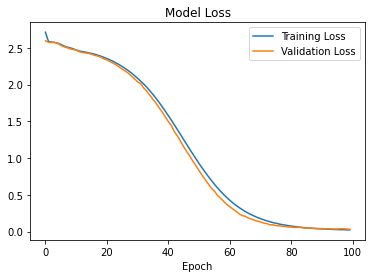

In [65]:
# Graphs
fig = plt.figure()
plt.title('Model Loss')
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.plot()

[]

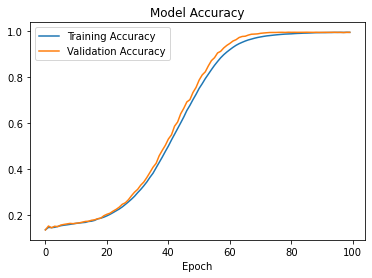

In [66]:
# Graphs
fig = plt.figure()
plt.title('Model Accuracy')
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.plot()

In [75]:
data = data.drop('predictions', axis=1)
predictions = 2*np.argmax(model.predict(param), axis=1)
data.insert(19, 'predictions', predictions)

<AxesSubplot:>

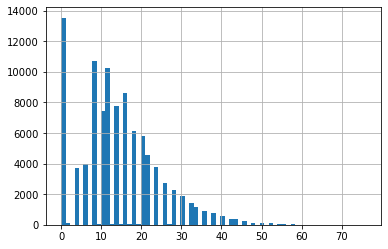

In [81]:
data.counts.hist(bins=69)

<AxesSubplot:>

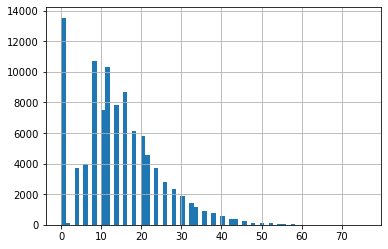

In [77]:
data.predictions.hist(bins=69)